On adapte l'article d'Acemoglu-Akcigit-Kerr à notre projet. Ainsi, nous modélisons la convergence technologique comme un processus cumulatif structuré par un réseau historique de proximités technologiques, mesuré par les cooccurrences passées de codes CPC.

On peut s’appuyer sur cette méthodologie des réseaux d’innovation en remplaçant les flux de citations par des cooccurrences de codes CPC sur un même brevet et qui mesurent une interaction technologique. Dans le modèle de l’article, le réseau passé structure l’innovation future et la prédit ; tandis que dans notre modèle, le réseau passé indiquera ce qui est banal, original, ou émergent.   L’innovation observée concernera pour nous la nouveauté combinatoire. Il nous sera ainsi possible de reprendre leur modèle économétrique en calculant les convergences prédites par le réseau : si des domaines voisins convergent fortement sur la période étudiée, alors ils sont davantage exposés à une convergence dans le futur. Cela nous amène à aborder la convergence technologique comme une dynamique cumulative expliquée par l’espace technologique hérité des années précédentes. 

In [5]:
import pandas as pd
import itertools
import numpy as np


In [6]:
# à mettre dans le terminal : gdown https://drive.google.com/uc?id=1Zi2RFRuZZf_OWDaocgcxhFcOsjqWrxJv

In [7]:

base_brevets = pd.read_parquet("patents_merged.parquet")

In [8]:
base_brevets.head()

,doc_number,doc7,ep_doc,publication_date,cpc4_list,person_id_list,app_name_list,address_list,city_list,postal_code_list,reg_code_list,ctry_code_list,reg_share_list,app_share_list,num_applicants
0,1911230,1911230,EP-1911230,20110105,"[H04L, H04B]",[8964],[QUALCOMM Incorporated],"[5775 Morehouse Drive,San Diego, CA 92121]",[None],[92121],[US06073],[US],[1.0],[1.0],1
1,1852468,1852468,EP-1852468,20090805,"[C08G, H01L, C08K, C08L, C09D]",[10990],"[Shin-Etsu Chemical Co., Ltd.]","[6-1, Ohtemachi 2-chome, Chiyoda-ku,Tokyo]",[Tokyo],[None],[JPD13],[JP],[1.0],[1.0],1
2,1932561,1932561,EP-1932561,20100217,"[A61B, A61N]",[46971525],[Commissariat à l'Energie Atomique],"[25, rue Leblanc Immeuble 'Le Ponant D',75015 ...",[Paris],[75015],[FR101],[FR],[1.0],[1.0],1
3,1991453,1991453,EP-1991453,20170906,"[Y02T, B60W, B60L, B60K]",[450],[ROBERT BOSCH GMBH],"[Postfach 30 02 20,70442 Stuttgart]",[Stuttgart],[70442],[DE111],[DE],[1.0],[1.0],1
4,1977104,1977104,EP-1977104,20091021,[F02M],[25653],"[KIMBERLY-CLARK WORLDWIDE, INC.]","[401 North Lake Street,Neenah, WI 54956]",[None],[54956],[US55139],[US],[1.0],[1.0],1


In [9]:
len(base_brevets)

2382887

In [10]:
base_brevets["year"] = base_brevets["publication_date"].astype(str).str[:4].astype(int)

In [11]:
base_brevets.head()

,doc_number,doc7,ep_doc,publication_date,cpc4_list,person_id_list,app_name_list,address_list,city_list,postal_code_list,reg_code_list,ctry_code_list,reg_share_list,app_share_list,num_applicants,year
0,1911230,1911230,EP-1911230,20110105,"[H04L, H04B]",[8964],[QUALCOMM Incorporated],"[5775 Morehouse Drive,San Diego, CA 92121]",[None],[92121],[US06073],[US],[1.0],[1.0],1,2011
1,1852468,1852468,EP-1852468,20090805,"[C08G, H01L, C08K, C08L, C09D]",[10990],"[Shin-Etsu Chemical Co., Ltd.]","[6-1, Ohtemachi 2-chome, Chiyoda-ku,Tokyo]",[Tokyo],[None],[JPD13],[JP],[1.0],[1.0],1,2009
2,1932561,1932561,EP-1932561,20100217,"[A61B, A61N]",[46971525],[Commissariat à l'Energie Atomique],"[25, rue Leblanc Immeuble 'Le Ponant D',75015 ...",[Paris],[75015],[FR101],[FR],[1.0],[1.0],1,2010
3,1991453,1991453,EP-1991453,20170906,"[Y02T, B60W, B60L, B60K]",[450],[ROBERT BOSCH GMBH],"[Postfach 30 02 20,70442 Stuttgart]",[Stuttgart],[70442],[DE111],[DE],[1.0],[1.0],1,2017
4,1977104,1977104,EP-1977104,20091021,[F02M],[25653],"[KIMBERLY-CLARK WORLDWIDE, INC.]","[401 North Lake Street,Neenah, WI 54956]",[None],[54956],[US55139],[US],[1.0],[1.0],1,2009


In [12]:
# on ne prend que les 3 premiers caractères des codes dans un premier temps pour regarder la convergence entre des domaines différents

def extract_classe(c):
    return c[:3]

base_brevets["liste_classes"] = base_brevets["cpc4_list"].apply(
    lambda arr: list({extract_classe(c) for c in arr})
)

base_brevets.head()

,doc_number,doc7,ep_doc,publication_date,cpc4_list,person_id_list,app_name_list,address_list,city_list,postal_code_list,reg_code_list,ctry_code_list,reg_share_list,app_share_list,num_applicants,year,liste_classes
0,1911230,1911230,EP-1911230,20110105,"[H04L, H04B]",[8964],[QUALCOMM Incorporated],"[5775 Morehouse Drive,San Diego, CA 92121]",[None],[92121],[US06073],[US],[1.0],[1.0],1,2011,[H04]
1,1852468,1852468,EP-1852468,20090805,"[C08G, H01L, C08K, C08L, C09D]",[10990],"[Shin-Etsu Chemical Co., Ltd.]","[6-1, Ohtemachi 2-chome, Chiyoda-ku,Tokyo]",[Tokyo],[None],[JPD13],[JP],[1.0],[1.0],1,2009,"[C09, H01, C08]"
2,1932561,1932561,EP-1932561,20100217,"[A61B, A61N]",[46971525],[Commissariat à l'Energie Atomique],"[25, rue Leblanc Immeuble 'Le Ponant D',75015 ...",[Paris],[75015],[FR101],[FR],[1.0],[1.0],1,2010,[A61]
3,1991453,1991453,EP-1991453,20170906,"[Y02T, B60W, B60L, B60K]",[450],[ROBERT BOSCH GMBH],"[Postfach 30 02 20,70442 Stuttgart]",[Stuttgart],[70442],[DE111],[DE],[1.0],[1.0],1,2017,"[B60, Y02]"
4,1977104,1977104,EP-1977104,20091021,[F02M],[25653],"[KIMBERLY-CLARK WORLDWIDE, INC.]","[401 North Lake Street,Neenah, WI 54956]",[None],[54956],[US55139],[US],[1.0],[1.0],1,2009,[F02]


In [13]:
# du coup on ne va garder que les brevets qui ont plus de deux codes dans liste_classes

multi_codes_brevets = base_brevets[base_brevets["liste_classes"].apply(lambda x: len(x) > 1)]

print("Nombre de brevets avec plusieurs CPC :", multi_codes_brevets.shape[0])
multi_codes_brevets.head()


Nombre de brevets avec plusieurs CPC : 1234382


,doc_number,doc7,ep_doc,publication_date,cpc4_list,person_id_list,app_name_list,address_list,city_list,postal_code_list,reg_code_list,ctry_code_list,reg_share_list,app_share_list,num_applicants,year,liste_classes
1,1852468,1852468,EP-1852468,20090805,"[C08G, H01L, C08K, C08L, C09D]",[10990],"[Shin-Etsu Chemical Co., Ltd.]","[6-1, Ohtemachi 2-chome, Chiyoda-ku,Tokyo]",[Tokyo],[None],[JPD13],[JP],[1.0],[1.0],1,2009,"[C09, H01, C08]"
3,1991453,1991453,EP-1991453,20170906,"[Y02T, B60W, B60L, B60K]",[450],[ROBERT BOSCH GMBH],"[Postfach 30 02 20,70442 Stuttgart]",[Stuttgart],[70442],[DE111],[DE],[1.0],[1.0],1,2017,"[B60, Y02]"
9,1984837,1984837,EP-1984837,20190508,"[H04L, H04J, G04G, G06F]",[51285633],[Microsemi Frequency and Time Corporation],"[2300 Orchard Parkway,San Jose, California 951...",[SAN JOSE California],[1017],[US06085],[US],[1.0],[1.0],1,2019,"[G06, H04, G04]"
10,1983865,1983865,EP-1983865,20150325,"[A61G, A47C]",[2010020],"[Hill-Rom Services, Inc.]","[1069 State Route 46 East,Batesville IN 47006]",[None],[47006],[US18137],[US],[1.0],[1.0],1,2015,"[A47, A61]"
13,1987085,1987085,EP-1987085,20090715,"[C08C, Y10S, C08J]",[291826],[KRATON Polymers Research B.V.],[Intellectual Property Services P.O. Box 37666...,[Amsterdam],[1030],[NL326],[NL],[1.0],[1.0],1,2009,"[Y10, C08]"


In [14]:
# multi_codes_brevets.to_csv("multi_codes_brevets.csv", index=False)

KeyboardInterrupt: 

In [15]:
multi_codes_brevets["year"].min(), multi_codes_brevets["year"].max()


(np.int64(1980), np.int64(2025))

## 1. Construction de la matrice de coocurrence historique (1980-2000)
L’objectif de cette étape est de caractériser l’espace technologique hérité, en mesurant quelles technologies (codes CPC) apparaissent fréquemment ensemble dans les brevets sur une période de référence.  
Cette matrice servira de réseau technologique structurant l’innovation future.


In [16]:
# Période de référence
base_1980_2000 = multi_codes_brevets[(multi_codes_brevets["year"] >= 1980) & (multi_codes_brevets["year"] <= 2000)].copy()




**Comptage des cooccurrences entre codes CPC**

Pour chaque brevet, on considère toutes les paires possibles de codes CPC.  
Chaque paire (i, j) indique que les technologies i et j sont mobilisées conjointement dans une même innovation.
Nous construisons ici une matrice de cooccurrence orientée, permettant de mesurer des proximités conditionnelles entre technologies.


In [17]:
# on compte les paires CPC
from collections import Counter

pair_counter = Counter()

for cpcs in base_1980_2000["liste_classes"]:
    for i, j in itertools.combinations(sorted(set(cpcs)), 2):
        pair_counter[(i, j)] += 1
        pair_counter[(j, i)] += 1  # matrice orientée


Mise en forme de la matrice de cooccurrence

Les comptages de cooccurrences sont transformés en un DataFrame afin de faciliter les opérations de normalisation et d’analyse ultérieures.


In [18]:
# on transforme la matrice en dataframe
cooc_df = pd.DataFrame(
    [(i, j, c) for (i, j), c in pair_counter.items()],
    columns=["cpc_i", "cpc_j", "count"]
)
cooc_df.head()

,cpc_i,cpc_j,count
0,H01,H10,2737
1,H10,H01,2737
2,G11,H03,640
3,H03,G11,640
4,C04,Y10,1226


**Normalisation de la matrice de cooccurrence**

Afin de passer de volumes bruts à des proximités technologiques comparables,  on normalise chaque ligne de la matrice de cooccurrence.

La quantité M_{i→j} mesure la probabilité d’observer la technologie j conditionnellement à l’utilisation de la technologie i.


In [19]:
# Somme des cooccurrences sortantes pour chaque CPC i
row_sums = cooc_df.groupby("cpc_i")["count"].sum().reset_index()
row_sums.columns = ["cpc_i", "row_sum"]

# Fusion avec la matrice principale
cooc_df = cooc_df.merge(row_sums, on="cpc_i")

# Normalisation
cooc_df["M_ij"] = cooc_df["count"] / cooc_df["row_sum"]


In [20]:
cooc_df.head()

,cpc_i,cpc_j,count,row_sum,M_ij
0,H01,H10,2737,34965,0.078278
1,H10,H01,2737,9486,0.288530
2,G11,H03,640,9112,0.070237
3,H03,G11,640,6237,0.102613
4,C04,Y10,1226,9662,0.126889


**Mesure de l’originalité des combinaisons technologiques**

L’originalité d’une combinaison de technologies est définie comme l’inverse de sa fréquence historique.  
Une combinaison rarement observée dans le passé est considérée comme plus originale.

On utilise une transformation logarithmique afin d’amplifier les différences entre combinaisons fréquentes et rares.


In [21]:
EPS = 1e-10
cooc_df["originality_pair"] = -np.log(cooc_df["M_ij"] + EPS)


**Calcul de l’originalité d’un brevet**

Pour chaque brevet postérieur à la période de référence, on calcule un score d’originalité en moyennant l’originalité de toutes les paires de codes CPC qu’il mobilise.

Ce score mesure la nouveauté combinatoire de l’innovation.


In [22]:
# dictionnaire
orig_dict = {
    (row.cpc_i, row.cpc_j): row.originality_pair
    for _, row in cooc_df.iterrows()
}


On crée une fonction qui donne l'originalité d'un brevet

In [23]:
def originality_of_patent(cpcs, orig_dict):
    pairs = list(itertools.combinations(sorted(set(cpcs)), 2))
    scores = []
    for i, j in pairs:
        if (i, j) in orig_dict:
            scores.append(orig_dict[(i, j)])
        else:
            # combinaison jamais observée historiquement
            scores.append(-np.log(EPS))
    return np.mean(scores) if scores else np.nan


**Application du score d’originalité aux brevets récents**

Nous appliquons le score d’originalité aux brevets publiés après 2010 afin d’analyser la dynamique de convergence technologique.


In [24]:
brevets_post_2000 = multi_codes_brevets[multi_codes_brevets["year"] > 2000].copy()

brevets_post_2000["originality"] = brevets_post_2000["liste_classes"].apply(
    lambda x: originality_of_patent(x, orig_dict)
)


**Construction de l’indice de convergence technologique observée**

Afin d’analyser la convergence technologique à un niveau agrégé,  
nous construisons un indice annuel de convergence par domaine technologique.

Pour cela, nous :
- identifions un code CPC principal pour chaque brevet,
- agrégeons les scores d’originalité au niveau (CPC, année).

Cet indice mesure l’intensité moyenne de la nouveauté combinatoire produite par un domaine donné à une date donnée.


In [25]:
# On définit le CPC principal comme le premier de la liste
brevets_post_2000["main_cpc"] = brevets_post_2000["liste_classes"].apply(lambda x: x[0])

# Indice de convergence observée
CI_obs = (
    brevets_post_2000
    .groupby(["main_cpc", "year"])["originality"]
    .mean()
    .reset_index()
    .rename(columns={"originality": "CI_obs"})
)


**Interprétation de l’indice de convergence observée**

Une valeur élevée de l’indice CI_obs indique que, en moyenne, les brevets du domaine concerné combinent des technologies historiquement éloignées.

Cet indicateur constitue notre mesure empirique de la convergence technologique.


**Construction de la convergence prédite par le réseau**

Dans la lignée d’Acemoglu,  Akcigit et Kerr (2016), nous utilisons le réseau technologique historique pour prédire la convergence future.

L’idée est la suivante : si un domaine est connecté à des domaines qui convergent fortement, alors il est structurellement exposé à une convergence future.

La convergence prédite est une moyenne pondérée des convergences passées des domaines voisins.


In [26]:
# On décale l'indice observé d'une année
CI_lag = CI_obs.copy()
CI_lag["year"] += 1
CI_lag = CI_lag.rename(columns={"CI_obs": "CI_lag"})


In [27]:
# construction de la convergence prédite
# Jointure réseau historique × convergence passée
CI_pred = (
    cooc_df[["cpc_i", "cpc_j", "M_ij"]]
    .merge(
        CI_lag,
        left_on="cpc_j",
        right_on="main_cpc",
        how="inner"
    )
)

# Pondération par les poids du réseau
CI_pred["weighted_CI"] = CI_pred["M_ij"] * CI_pred["CI_lag"]

# Agrégation finale
CI_pred = (
    CI_pred
    .groupby(["cpc_i", "year"])["weighted_CI"]
    .sum()
    .reset_index()
    .rename(columns={
        "cpc_i": "main_cpc",
        "weighted_CI": "CI_pred"
    })
)


**Lecture de la convergence prédite**

La variable CI_pred mesure la convergence qu’un domaine devrait connaître au regard de sa position dans l’espace technologique hérité.

Elle capte une dynamique cumulative de la convergence,
indépendante des innovations propres au domaine considéré.


**Construction de la base de données de panel**

Nous construisons une base de données de type panel, où chaque observation correspond à un couple (domaine technologique, année).

Cette base permet d’estimer économétriquement le rôle structurant du réseau technologique dans la convergence.


In [28]:
panel = (
    CI_obs
    .merge(
        CI_pred,
        on=["main_cpc", "year"],
        how="inner"
    )
)


## Modèle économétrique

Nous estimons le modèle suivant :

CI_{k,t} = β · CÎ_{k,t} + φ_k + η_t + ε_{k,t}

où :
- CI_{k,t} est la convergence observée,
- CÎ_{k,t} est la convergence prédite par le réseau,
- φ_k sont des effets fixes domaine,
- η_t sont des effets fixes temporels.

Le paramètre β mesure l’intensité de la dynamique cumulative de convergence.


In [29]:
import statsmodels.formula.api as smf

model = smf.ols(
    "CI_obs ~ CI_pred + C(main_cpc) + C(year)",
    data=panel
).fit(cov_type="HC1")


In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 CI_obs   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     308.8
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        14:50:58   Log-Likelihood:                -3375.6
No. Observations:                3013   AIC:                             7057.
Df Residuals:                    2860   BIC:                             7977.
Df Model:                         152                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.7422      0

**Interprétation des résultats**

Un coefficient β positif et significatif indique que
la convergence technologique est en partie expliquée
par la structure héritée de l’espace technologique.

Cela suggère que la convergence n’est pas aléatoire,
mais résulte d’une dynamique cumulative structurée par les interactions passées entre technologies.


## Évolution temporelle moyenne de la convergence technologique

Nous représentons l’évolution moyenne de l’indice de convergence afin d’identifier des tendances globales dans la dynamique d’innovation.


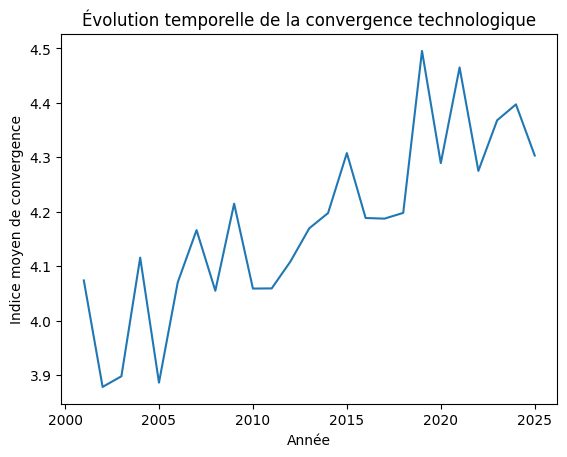

In [31]:
# série temporelle
import matplotlib.pyplot as plt

CI_time = (
    CI_obs
    .groupby("year")["CI_obs"]
    .mean()
    .reset_index()
)

plt.figure()
plt.plot(CI_time["year"], CI_time["CI_obs"])
plt.xlabel("Année")
plt.ylabel("Indice moyen de convergence")
plt.title("Évolution temporelle de la convergence technologique")
plt.show()


## Visualisation du réseau technologique

Afin de visualiser l’espace technologique,
nous représentons les liens les plus forts du réseau de cooccurrence historique.


In [32]:
!pip install networkx

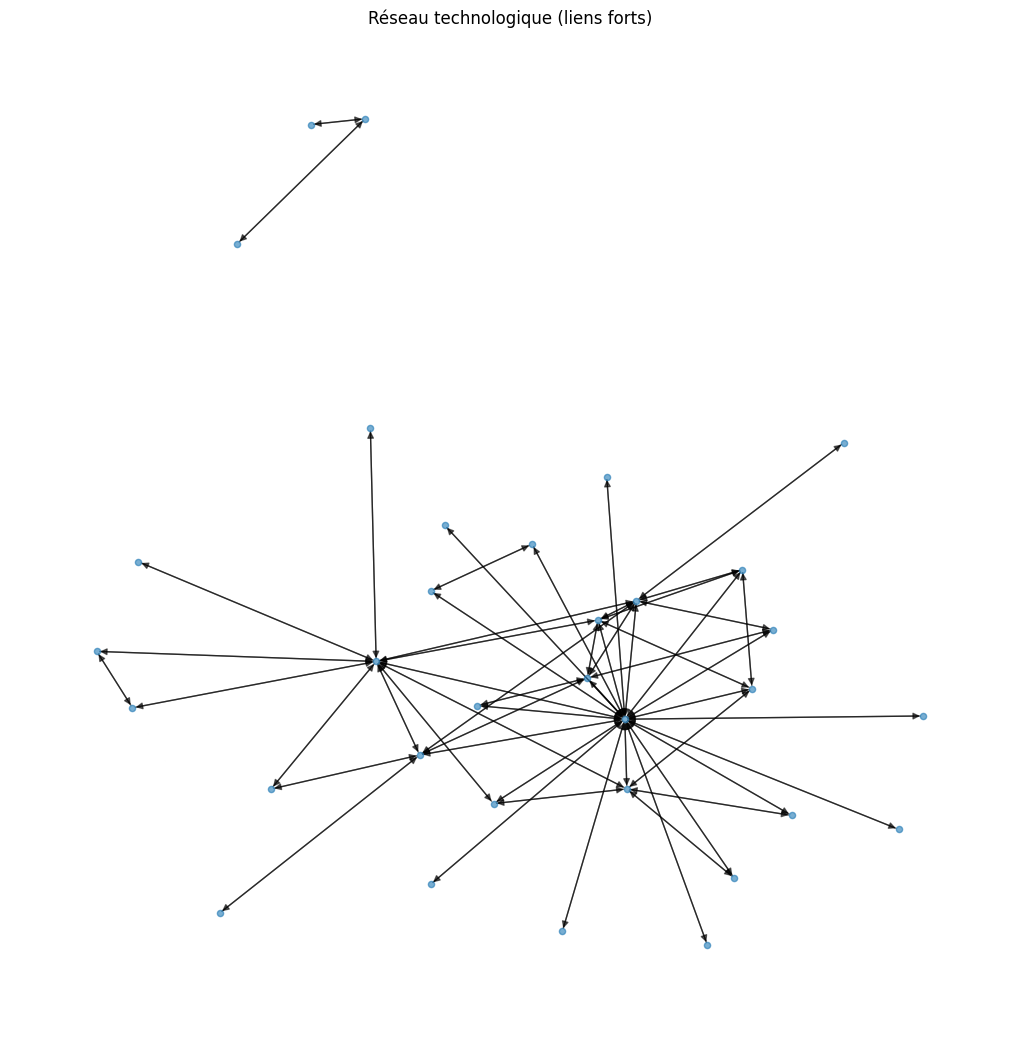

In [33]:
import networkx as nx

# On garde les liens les plus significatifs
edges = cooc_df[cooc_df["count"] > cooc_df["count"].quantile(0.99)]

G = nx.from_pandas_edgelist(
    edges,
    source="cpc_i",
    target="cpc_j",
    edge_attr="count",
    create_using=nx.DiGraph()
)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, node_size=20, alpha=0.6)
plt.title("Réseau technologique (liens forts)")
plt.show()


## Clustering dynamique des technologies

Afin d’identifier des groupes cohérents de technologies et leur évolution dans le temps,
nous procédons à un clustering des codes CPC fondé sur leurs proximités technologiques.

Le clustering est réalisé sur des fenêtres temporelles successives,
ce qui permet d’analyser la stabilité, la fragmentation ou la fusion des clusters.


**Représentation vectorielle des technologies**

Chaque technologie est représentée par un vecteur correspondant à ses liens vers les autres technologies dans le réseau de cooccurrence.

Cette représentation permet de définir une distance technologique entre codes CPC.


In [34]:
# Pivot pour obtenir une matrice CPC x CPC
M_matrix = (
    cooc_df
    .pivot(index="cpc_i", columns="cpc_j", values="M_ij")
    .fillna(0)
)


**Réduction de dimension par analyse en composantes principales**

Avant de procéder au clustering, nous réduisons la dimension de l’espace technologique afin de capturer les principales structures de proximité entre technologies.


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, random_state=0)
M_pca = pca.fit_transform(M_matrix)


**Clustering des technologies**

Nous appliquons un algorithme de k-means afin d’identifier des groupes de technologies proches dans l’espace technologique réduit.


In [36]:
from sklearn.cluster import KMeans

k = 10  # à justifier
kmeans = KMeans(n_clusters=k, random_state=0)

clusters = kmeans.fit_predict(M_pca)

cluster_df = pd.DataFrame({
    "cpc": M_matrix.index,
    "cluster": clusters
})


Les clusters technologiques sont obtenus par une méthode de clustering appliquée à une représentation vectorielle des codes CPC, fondée sur leurs cooccurrences dans les brevets. Chaque code est caractérisé par un vecteur de probabilités conditionnelles mesurant ses interactions avec les autres technologies.
Les clusters identifient ainsi des ensembles de technologies structurellement proches dans l’espace technologique.

**Clustering dynamique par fenêtres temporelles**

Afin de suivre l’évolution des clusters technologiques, nous répétons la procédure de clustering sur des fenêtres temporelles successives de cinq ans.

Cette approche permet d’identifier des fusions,
des scissions et l’émergence de nouveaux clusters.


*Construction de la matrice de cooccurrence pour une fenêtre temporelle donnée*

Pour chaque fenêtre temporelle, nous reconstruisons une matrice de cooccurrence
des codes CPC afin de capturer l’état de l’espace technologique sur la période considérée.
Cette matrice est ensuite normalisée afin d’obtenir une matrice de proximités technologiques conditionnelles.


In [37]:
from collections import Counter
import itertools
import pandas as pd
import numpy as np

def build_cooc_matrix(df, year_start, year_end):
    """
    Construit une matrice de cooccurrence orientée et normalisée (M_ij)
    pour une fenêtre temporelle donnée.
    
    Paramètres
    ----------
    df : DataFrame
        Base de brevets contenant au moins les colonnes :
        - 'year'
        - 'liste_classes' (liste de codes CPC)
        
    year_start : int
        Année de début de la fenêtre
        
    year_end : int
        Année de fin de la fenêtre
        
    Retour
    ------
    cooc_df : DataFrame
        DataFrame contenant :
        - cpc_i : CPC source
        - cpc_j : CPC cible
        - count : nombre de cooccurrences
        - M_ij : poids normalisé
    """
    
    # Filtrage temporel
    df_w = df[
        (df["year"] >= year_start) &
        (df["year"] <= year_end)
    ]
    
    # On garde uniquement les brevets avec au moins deux CPC
    df_w = df_w[
        df_w["liste_classes"].apply(lambda x: isinstance(x, list) and len(x) >= 2)
    ]
    
    # Comptage des cooccurrences orientées
    pair_counter = Counter()
    
    for cpcs in df_w["liste_classes"]:
        cpcs_unique = sorted(set(cpcs))
        
        for i, j in itertools.combinations(cpcs_unique, 2):
            pair_counter[(i, j)] += 1
            pair_counter[(j, i)] += 1  # orientation volontaire
    
    # Passage en DataFrame
    cooc_df = pd.DataFrame(
        [(i, j, c) for (i, j), c in pair_counter.items()],
        columns=["cpc_i", "cpc_j", "count"]
    )
    
    # Normalisation (matrice M à la AAK)
    row_sums = (
        cooc_df
        .groupby("cpc_i")["count"]
        .sum()
        .reset_index()
        .rename(columns={"count": "row_sum"})
    )
    
    cooc_df = cooc_df.merge(row_sums, on="cpc_i", how="left")
    cooc_df["M_ij"] = cooc_df["count"] / cooc_df["row_sum"]
    
    return cooc_df


In [38]:
windows = [(1995, 1999), (2000, 2004), (2005, 2009), (2010, 2014), (2015, 2018)]

cluster_time = []

for start, end in windows:
    df_w = multi_codes_brevets[
        (multi_codes_brevets["year"] >= start) &
        (multi_codes_brevets["year"] <= end)
    ]
    
    # on refait la matrice de cooccurrence pour la fenêtre
    
    cooc_df_w = build_cooc_matrix(
    multi_codes_brevets,
    year_start=start,
    year_end=end
)

    
    M_w = (
        cooc_df_w
        .pivot(index="cpc_i", columns="cpc_j", values="M_ij")
        .fillna(0)
    )
    
    M_pca_w = pca.fit_transform(M_w)
    clusters_w = kmeans.fit_predict(M_pca_w)
    
    cluster_time.append(
        pd.DataFrame({
            "cpc": M_w.index,
            "cluster": clusters_w,
            "period": f"{start}-{end}"
        })
    )

cluster_time_df = pd.concat(cluster_time)


**Analyse des transitions de clusters**

Nous analysons les changements d’appartenance des technologies aux clusters
entre périodes successives afin de détecter des phénomènes de convergence.


In [39]:
transition = (
    cluster_time_df
    .merge(
        cluster_time_df,
        on="cpc",
        suffixes=("_t", "_t1")
    )
)

transition = transition[
    transition["period_t"] != transition["period_t1"]
]


**Visualisation des fusions et scissions de clusters**

Les diagrammes de flux permettent de visualiser
les mouvements des technologies entre clusters,
mettant en évidence des phénomènes de convergence technologique.


**Visualisation dynamique des clusters technologiques : diagramme de Sankey**

Afin de visualiser les recompositions de l’espace technologique au cours du temps,
nous utilisons un diagramme de Sankey représentant les flux de codes CPC
d’un cluster à un autre entre deux fenêtres temporelles consécutives.

Chaque nœud correspond à un cluster sur une période donnée,
et l’épaisseur des liens reflète le nombre de CPC qui changent (ou restent) de cluster.


In [40]:
import pandas as pd
import plotly.graph_objects as go


In [46]:
def build_cluster_transitions(
    cluster_df,
    time_col,
    cpc_col="cpc",
    cluster_col="cluster"
):
    """
    Construit les transitions de clusters entre périodes consécutives.
    """
    
    transitions = []
    
    periods = sorted(cluster_df[time_col].unique())
    
    for t1, t2 in zip(periods[:-1], periods[1:]):
        
        df1 = (
            cluster_df[cluster_df[time_col] == t1]
            [[cpc_col, cluster_col]]
            .rename(columns={cluster_col: "cluster_t"})
        )
        
        df2 = (
            cluster_df[cluster_df[time_col] == t2]
            [[cpc_col, cluster_col]]
            .rename(columns={cluster_col: "cluster_t1"})
        )
        
        merged = df1.merge(df2, on=cpc_col, how="inner")
        
        trans = (
            merged
            .groupby(["cluster_t", "cluster_t1"])
            .size()
            .reset_index(name="count")
        )
        
        trans["period_from"] = t1
        trans["period_to"] = t2
        
        transitions.append(trans)
    
    return pd.concat(transitions, ignore_index=True)


In [47]:
transitions_df = build_cluster_transitions(
    cluster_time_df,
    time_col="period"
)




In [48]:
transitions_df.head()


,cluster_t,cluster_t1,count,period_from,period_to
0,0,0,3,1995-1999,2000-2004
1,0,1,2,1995-1999,2000-2004
2,0,3,5,1995-1999,2000-2004
3,1,1,1,1995-1999,2000-2004
4,1,2,3,1995-1999,2000-2004


In [49]:
# Création des noeuds/ labels uniques
nodes_from = (
    transitions_df["period_from"] + " | C" + transitions_df["cluster_t"].astype(str)
)
nodes_to = (
    transitions_df["period_to"] + " | C" + transitions_df["cluster_t1"].astype(str)
)

all_nodes = pd.Index(nodes_from.tolist() + nodes_to.tolist()).unique()

node_id = {name: i for i, name in enumerate(all_nodes)}


In [50]:
# Construction des liens
sources = nodes_from.map(node_id)
targets = nodes_to.map(node_id)
values = transitions_df["count"]


In [51]:
# Diagramme de Sankey

fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=all_nodes
            ),
            link=dict(
                source=sources,
                target=targets,
                value=values
            )
        )
    ]
)

fig.update_layout(
    title="Évolution des clusters technologiques (codes CPC)",
    font_size=11,
    width=1000,
    height=600
)

fig.show()


Nous construisons un diagramme de Sankey en reliant les clusters technologiques estimés sur des fenêtres temporelles consécutives.

Chaque noeud représente un cluster technologique à une période donnée.

Chaque lien représente le nombre de codes CPC qui passent d’un cluster à un autre entre deux périodes consécutives, ce qui permet de visualiser la stabilité, la fusion ou l’éclatement des domaines technologiques. Un lien épais est le signe d'une forte continuité, tandis qu'un lien fin représente une transition vers un autre cluster.

Un gros lien diagonal représente la stabilité technologique. 
Plusieurs liens qui entrent vers un noeud représente une convergence.

Un noeud qui envoie vers plusieurs clusters différents est le signe d'une différenciation, d'un éclatement.

Chaque noeud représente un cluster technologique à une période donnée

Maintenant qu'on a les transitions d'un cluster à l'autre sur des périodes successives, on voudrait regarder quels codes subissent des transitions de clusters. On va construire une fonction qui retourne les codes CPC qui appartiennent à une transition donnée.

In [52]:
def get_cpcs_in_transition(
    cluster_time_df,
    period_from,
    period_to,
    cluster_from,
    cluster_to
):
    """
    Retourne les codes CPC appartenant à une transition donnée.
    """
    
    df_from = cluster_time_df[
        (cluster_time_df["period"] == period_from) &
        (cluster_time_df["cluster"] == cluster_from)
    ][["cpc"]]
    
    df_to = cluster_time_df[
        (cluster_time_df["period"] == period_to) &
        (cluster_time_df["cluster"] == cluster_to)
    ][["cpc"]]
    
    return df_from.merge(df_to, on="cpc", how="inner")


In [53]:
# exemple : quels sont les codes qui passent du cluster 1 à 3 
# entre la période 2000-2004 et 2005-2009 ?
get_cpcs_in_transition(
    cluster_time_df,
    "2000-2004",
    "2005-2009",
    1,
    3
)


,cpc
0,Y04


On veut maintenant étudier la convergence. On considère qu'il y a convergence si, sur une période donnée, un cluster technologique reçoit des flux significatifs de codes CPC
provenant de plusieurs clusters distincts lors de la période précédente.

In [54]:
transitions_df.head(20)


,cluster_t,cluster_t1,count,period_from,period_to
0,0,0,3,1995-1999,2000-2004
1,0,1,2,1995-1999,2000-2004
2,0,3,5,1995-1999,2000-2004
3,1,1,1,1995-1999,2000-2004
4,1,2,3,1995-1999,2000-2004
5,1,3,3,1995-1999,2000-2004
6,2,3,5,1995-1999,2000-2004
7,2,5,1,1995-1999,2000-2004
8,2,8,3,1995-1999,2000-2004
9,2,9,4,1995-1999,2000-2004


Le cluster 3 en 2000–2004 reçoit des CPC provenant d’au moins 6 clusters différents à la période précédente.

In [55]:
cluster_time_df.head(20)


,cpc,cluster,period
0,A01,6,1995-1999
1,A21,6,1995-1999
2,A22,4,1995-1999
3,A23,2,1995-1999
4,A24,4,1995-1999
5,A41,9,1995-1999
6,A42,2,1995-1999
7,A43,9,1995-1999
8,A44,9,1995-1999
9,A45,4,1995-1999


In [56]:
transitions_df.groupby(
    ["period_to", "cluster_t1"]
)["cluster_t"].nunique().reset_index()


,period_to,cluster_t1,cluster_t
0,2000-2004,0,2
1,2000-2004,1,5
2,2000-2004,2,4
3,2000-2004,3,8
4,2000-2004,4,3
5,2000-2004,5,3
6,2000-2004,6,1
7,2000-2004,7,2
8,2000-2004,8,1
9,2000-2004,9,4


Un cluster est dit “convergent” sur une période donnée s’il reçoit
des flux significatifs provenant de plusieurs clusters distincts
lors de la période précédente.

Avec tes données, cela se traduit par :

- un nombre élevé de cluster_t distincts

- des flux non négligeables (count > 1)

le cluster 3 (2000–2004) remplit parfaitement ces critères.

En analysant cluster_time_df.head pour 1995-1999, on voir que 
- Cluster 6 : A01, A21, A61, B01, B04 (agriculture, chimie, médical)

- Cluster 2 : A23, A42, A46, A63, B05 (biens de consommation, mécanique)

- Cluster 9 : A41, A43, A44 (textile, objets manufacturés)

qui sont  très différents, se retrouvent ensemble dans le cluster 3. Cela signifie que des technologies auparavant séparées commencent à être mobilisées conjointement dans les mêmes brevets.

L’analyse des transitions de clusters met en évidence des phénomènes marqués de convergence technologique. En particulier, le cluster 3 sur la période 2000–2004 reçoit des flux en provenance de huit clusters distincts lors de la période précédente, ce qui en fait un pôle de recomposition majeur de l’espace technologique. Les codes CPC à l’origine de ces flux couvrent des domaines historiquement hétérogènes, tels que l’agriculture, la chimie, la mécanique ou les biens de consommation, suggérant un processus de recombinaison des connaissances et l’émergence de technologies transversales.

Quels sont les CPC du cluster 3 ?

In [57]:
cluster_3_2000 = cluster_time_df[
    (cluster_time_df["period"] == "2000-2004") &
    (cluster_time_df["cluster"] == 3)
]["cpc"].sort_values().unique()

cluster_3_2000


array(['A62', 'B01', 'B05', 'B08', 'B22', 'B24', 'B28', 'B33', 'B82',
       'C03', 'C04', 'C06', 'C08', 'C09', 'C14', 'C23', 'C25', 'E01',
       'E21', 'F21', 'F26', 'F42', 'G01', 'G02', 'G03', 'Y02', 'Y10'],
      dtype=object)

Analyse : on voit que ces CPC n’appartiennent pas à une seule section, mais couvrent A, B, C, E, F, G, Y. Les sections B etC sont très dominants, ils correspondent aux porcédés industriels et à la chimie. Le coeur du cluster est donc composé d'ingénierie des matériaux avancés. Ensuite, E représente le génie civil et l'extraction, F, la physique appliquée et les procédés énergétiques, G l'instrumentation et l'optique, et Y les technologies transversales. 

Il constitue donc un espace de recombinaison entre chimie avancée, science des matériaux, procédés industriels, instrumentation, enjeux environnementaux

Comment évolue le cluster 3 sur le temps long ? Est-ce un cluster transitoire ou un véritable pôle technologique durable ?

On regarde la trajectoire des CPC du cluster 3

In [58]:
cpc_cluster_3 = cluster_3_2000.tolist()

traj_cluster_3 = cluster_time_df[
    cluster_time_df["cpc"].isin(cpc_cluster_3)
].sort_values(["cpc", "period"])

traj_cluster_3.head(20)


,cpc,cluster,period
13,A62,7,1995-1999
13,A62,3,2000-2004
13,A62,2,2005-2009
13,A62,5,2010-2014
13,A62,3,2015-2018
15,B01,6,1995-1999
15,B01,3,2000-2004
15,B01,8,2005-2009
15,B01,7,2010-2014
15,B01,7,2015-2018


Ensuite, on veut regarder la stabilité du cluster 3 en s'intéressant à la part des CPC qui restent dans le même cluster

In [59]:
stability = (
    traj_cluster_3
    .groupby("period")["cluster"]
    .apply(lambda x: (x == 3).mean())
    .reset_index(name="share_still_in_cluster_3")
)

stability


,period,share_still_in_cluster_3
0,1995-1999,0.037037
1,2000-2004,1.000000
2,2005-2009,0.000000
3,2010-2014,0.000000
4,2015-2018,0.259259


- si la stabilité est proche de 1, on a un cluster stable, et donc potentiellement une nouvelle discipline installée. 

- si la stabilité baisse, alors le cluster se recompose, c'était une phase expérimentale.

- si la stabilité augmente, le cluster est attracteur  et émergent

On veut maintenant construire un indice de convergence. Pour chaque cluster cible 
𝑘 et période t, on regarde :
- d’où viennent les CPC
- à quel point les sources sont diversifiées

In [60]:
import numpy as np

def convergence_index(transitions_df):
    """
    Calcule un indice de convergence basé sur l'entropie
    des flux entrants par cluster et période.
    """
    
    df = transitions_df.copy()
    
    # Part des flux par source
    df["p"] = (
        df["count"] /
        df.groupby(["period_to", "cluster_t1"])["count"].transform("sum")
    )
    
    # Entropie
    conv = (
        df
        .groupby(["period_to", "cluster_t1"])
        .apply(lambda x: -(x["p"] * np.log(x["p"])).sum())
        .reset_index(name="convergence_index")
    )
    
    return conv


In [61]:
conv_index_df = convergence_index(transitions_df)
conv_index_df.sort_values("convergence_index", ascending=False).head(10)


/tmp/ipykernel_18270/342423518.py:21: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,period_to,cluster_t1,convergence_index
3,2000-2004,3,1.724871
25,2010-2014,5,1.383174
28,2010-2014,8,1.374776
37,2015-2018,7,1.362447
1,2000-2004,1,1.318582
26,2010-2014,6,1.316302
36,2015-2018,6,1.265001
27,2010-2014,7,1.234839
2,2000-2004,2,1.195268
18,2005-2009,8,1.132648


Plus l'indice est élevé, plus il y a convergence. L'indice augmente quand il y a bcp de clusters sources. Il est indépendant du nombre de CPC et est comparable dans le temps.